Dataset: https://drryanmaness.wixsite.com/cyberconflict/cyber-conflict-dataset

- States: A, B
- Cyber incidents: A (initiator) -> B (target)
- Dyadic dataset: A <-> B

In [91]:
import pandas as pd

In [92]:
file_path = 'data/DCID.csv'
dcid = pd.read_csv(file_path)
print(dcid.head())

# cow_contries = pd.read_csv('data/COW-country-codes.csv')

   Cyberincidentnum  Dyadpair StateA  StateB                    Name  \
0                 1      2365     US  Russia  Regin malware campaign   
1                 1      2365     US  Russia             Duke Series   
2                 2      2365     US  Russia    QWERTY keystroke log   
3                 2      2365     US  Russia             Duke Series   
4                 3      2365     US  Russia           Duke Series_A   

  interactionstartdate  method  targettype  initiator  target  ...  Mdisplay-  \
0             01.02.08       3           2          2     365  ...        2.8   
1             08.04.08       4           2        365       2  ...        2.8   
2             01.02.08       4           2          2     365  ...        2.8   
3             09.04.08       4           2        365       2  ...        2.8   
4             08.04.08       4           2        365       2  ...        2.8   

   Musage-  Mil_Negative  Mpromise+  Mcoop+  Mconfid+  Mil_Positive  \
0      0.

In [93]:
cow_countries = pd.read_csv('data/COW-country-codes.csv')

dcid = dcid.merge(cow_countries, left_on='initiator', right_on='CCode', how='left')
dcid = dcid.merge(cow_countries, left_on='target', right_on='CCode', how='left')

# USA = 2
# RUS = 365

dcid.rename(columns={'StateAbb_x': 'initiator_iso'}, inplace=True)
dcid.rename(columns={'StateAbb_y': 'target_iso'}, inplace=True)

dcid = dcid[['initiator_iso', 'target_iso']]

print(dcid.head())

  initiator_iso target_iso
0           USA        RUS
1           RUS        USA
2           USA        RUS
3           RUS        USA
4           RUS        USA


In [94]:
adjacency_matrix = pd.pivot_table(dcid, index='initiator_iso', columns='target_iso', aggfunc=len, fill_value=0)
print(adjacency_matrix)


target_iso     AFG  AUL  BAH  CAN  CHN  DRV  EST  FRN  GMY  GRG  ...  ROK  \
initiator_iso                                                    ...        
AFG              0    0    0    0    0    0    0    0    0    0  ...    0   
AUL              0    0    0    0    3    0    0    0    0    0  ...    0   
BAH              0    0    0    0    0    0    0    0    0    0  ...    0   
CAN              0    0    0    0    0    0    0    0    0    0  ...    0   
CHN              0    3    0    0    0   10    0    0    0    0  ...    0   
DRV              0    0    0    0    9    1    0    0    0    0  ...    0   
EST              0    0    0    0    0    0    0    0    0    0  ...    0   
FRN              0    0    0    0    0    0    0    0    0    0  ...    0   
GMY              0    0    0    0    0    0    0    0    0    0  ...    0   
GRG              0    0    0    0    0    0    0    0    0    0  ...    0   
IND              0    0    0    0   11    0    0    0    0    0  ...    0   

In [95]:
# adjacency_matrix.to_csv('adjacency_matrix.csv', index=True)


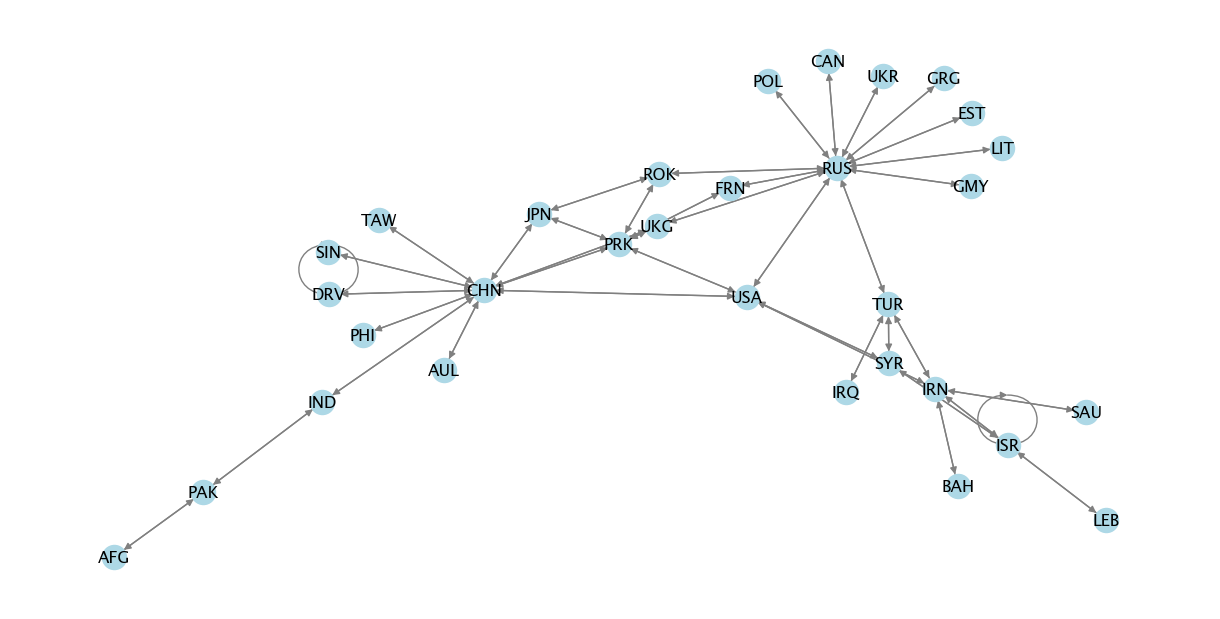

[('USA', {}), ('RUS', {}), ('IRN', {}), ('SYR', {}), ('CHN', {}), ('PRK', {}), ('CAN', {}), ('UKG', {}), ('FRN', {}), ('GMY', {}), ('POL', {}), ('EST', {}), ('LIT', {}), ('UKR', {}), ('GRG', {}), ('TUR', {}), ('ROK', {}), ('ISR', {}), ('SAU', {}), ('BAH', {}), ('IRQ', {}), ('LEB', {}), ('PAK', {}), ('AFG', {}), ('TAW', {}), ('JPN', {}), ('IND', {}), ('DRV', {}), ('SIN', {}), ('PHI', {}), ('AUL', {})]


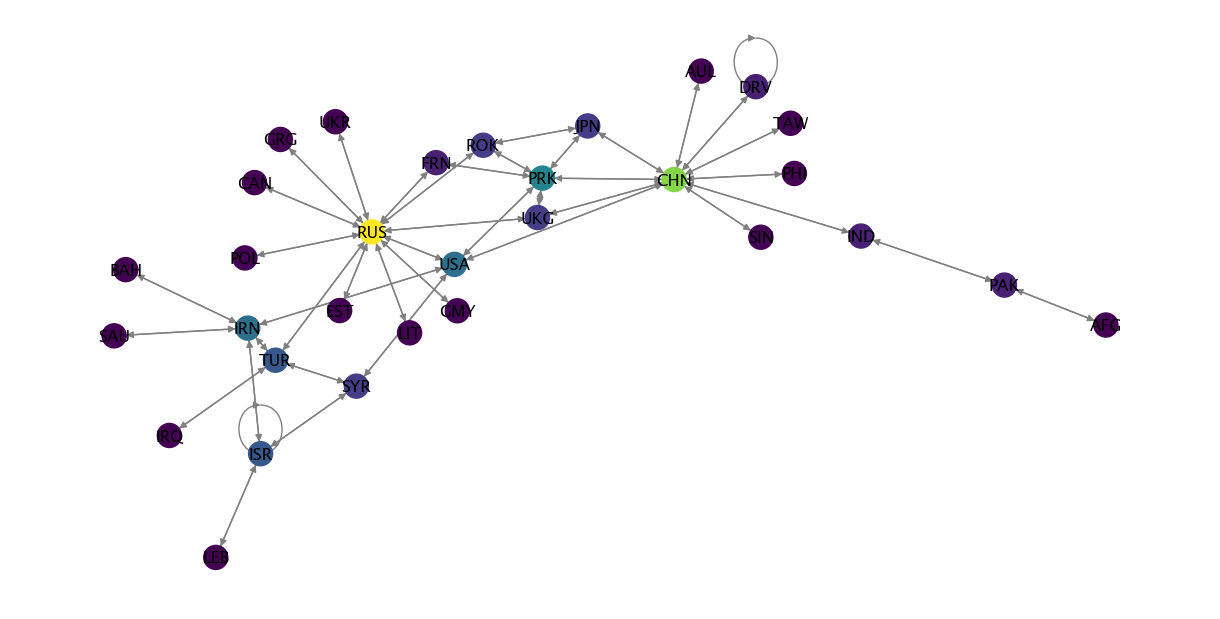

In [99]:
import networkx as nx
from matplotlib import pyplot as plt # type: ignore

G = nx.DiGraph(adjacency_matrix)

G = nx.DiGraph()
G.add_edges_from(dcid.values)

plt.figure(figsize=(12, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', font_weight='bold')
plt.show()

# color the nodes based on their degree
plt.figure(figsize=(12, 6))
nx.draw(G, with_labels=True, node_color=[G.degree(node) for node in G], edge_color='gray', font_weight='bold')

# show the datastructure of the graph
print(G.nodes(data=True))



/var/folders/_n/cr6ptksj1dsbz9x2708vf12m0000gn/T/ipykernel_16015/2847697511.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


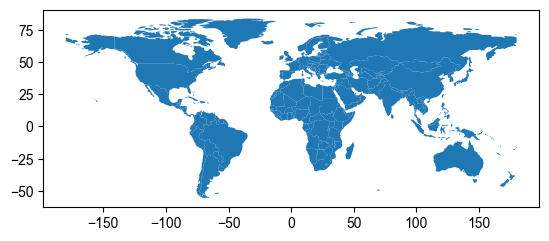

(39.7837304, -100.445882)


In [97]:
# Show the network on a map
# https://towardsdatascience.com/from-geojson-to-network-graph-analyzing-world-country-borders-in-python-ab81b5a8ce5a 

import geopandas as gpd
plt.rcParams['font.family'] = 'Arial'

world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_map = world_map[world_map['continent'] != 'Antarctica']
world_map.plot()
plt.show() 

world_map = world_map.set_index('iso_a3')

# 1. Geocode the countries
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dcid-sna")

def geolocate(country):
    loc = geolocator.geocode(country)
    return (loc.latitude, loc.longitude)

print(geolocate('USA'))

# 2. Add the latitude and longitude to the graph

# for node in G.nodes:
#     country = labels[node]
#     lat, lon = geolocate(country)
#     G.nodes[node]['latitude'] = lat
#     G.nodes[node]['longitude'] = lon
# node_positions = {n: (d['longitude'], d['latitude']) for n, d in G.nodes(data=True)}

# 3. Plot the network on the map



In [98]:
centrality = nx.degree_centrality(G)
centrality = pd.DataFrame(centrality.items(), columns=['Country', 'Centrality'])
centrality = centrality.sort_values(by='Centrality', ascending=False)
print(centrality)


   Country  Centrality
1      RUS    0.800000
4      CHN    0.666667
5      PRK    0.400000
2      IRN    0.333333
0      USA    0.333333
17     ISR    0.266667
15     TUR    0.266667
25     JPN    0.200000
16     ROK    0.200000
3      SYR    0.200000
7      UKG    0.200000
8      FRN    0.133333
22     PAK    0.133333
27     DRV    0.133333
26     IND    0.133333
14     GRG    0.066667
13     UKR    0.066667
12     LIT    0.066667
11     EST    0.066667
10     POL    0.066667
9      GMY    0.066667
6      CAN    0.066667
18     SAU    0.066667
21     LEB    0.066667
20     IRQ    0.066667
19     BAH    0.066667
24     TAW    0.066667
23     AFG    0.066667
28     SIN    0.066667
29     PHI    0.066667
30     AUL    0.066667
